In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 获取股票数据
bar_df = pd.read_excel('./qdii/{}bar.xlsx'.format(513880)).iloc[:-2]['收盘价(元)'].values.tolist()
stock_price_data = bar_df  # 这里填写历史股票价格数据

# 获得收益率数据
log_returns = np.log(np.array(stock_price_data[1:])) - np.log(np.array(stock_price_data[:-1]))

# 计算平均收益率和波动率
mu = np.mean(log_returns)
sigma = np.std(log_returns)

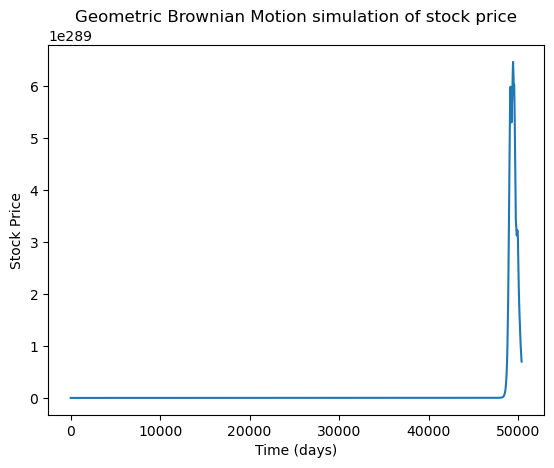

In [3]:
# 模拟价格变化
T = 200  # 模拟时间长度，单位为天
dt = 1/252  # 模拟时间步长，单位为年
N = int(T/dt)
S = np.zeros(N)
S[0] = stock_price_data[-1]  # 假设当前价格和历史价格相同

# 构造标准布朗运动
W = np.random.standard_normal(N)
W = np.cumsum(W)*np.sqrt(dt) 

# 应用几何布朗运动公式
for i in range(1, N):
    S[i] = S[i-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*W[i])
    
# 绘制模拟结果
plt.plot(S)
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion simulation of stock price')
plt.show()